In [1]:
import numpy as np
import pandas as pd

In [2]:
su = pd.read_csv("D:/Files/2019 Spring/High P Com/Project/trace_201708/trace_201708/server_usage.csv")

### server_usage.csv 

In [3]:
su.head()

,timestamp,machineID,util_CPU,util_memory,util_disk,load1,load5,load15
0,41700,237,23.38,30.080000,42.200001,15.82,13.860000,12.64
1,39600,265,26.36,29.540000,57.599998,17.46,18.900000,16.70
2,42600,770,49.14,60.099999,41.860001,33.20,31.220000,30.52
3,40800,776,33.24,47.520000,43.599998,21.84,22.100000,24.02
4,42900,393,45.72,58.720000,42.000000,34.10,36.239999,36.92


In [84]:
su_timestamp = np.sort(su.timestamp)

In [85]:
su_timestamp

array([39600, 39600, 39600, ..., 82500, 82500, 82500], dtype=int64)

In [92]:
su_machineID = np.sort(su.machineID)
su_machineID

array([   1,    1,    1, ..., 1313, 1313, 1313], dtype=int64)

From the sorted timestamp we can see that timestamp is from 39600 to 82500, measure in second. <br>
Therefore, the time duration was 82500-39600 = 42900s = 11.9h <br >

### Now we compute maxium, minium and average CPU utilization

In [15]:
timestamps = np.sort((list(set(su.timestamp))))
timestamps

array([39600, 39900, 40200, 40500, 40800, 41100, 41400, 41700, 42000,
       42300, 42600, 42900, 43200, 43500, 43800, 44100, 44400, 44700,
       45000, 45300, 45600, 45900, 46200, 46500, 46800, 47100, 47400,
       47700, 48000, 48300, 48600, 48900, 49200, 49500, 49800, 50100,
       50400, 50700, 51000, 51300, 51600, 51900, 52200, 52500, 52800,
       53100, 53400, 53700, 54000, 54300, 54600, 54900, 55200, 55500,
       55800, 56100, 56400, 56700, 57000, 57300, 57600, 57900, 58200,
       58500, 58800, 59100, 59400, 59700, 60000, 60300, 60600, 60900,
       61200, 61500, 61800, 62100, 62400, 62700, 63000, 63300, 63600,
       63900, 64200, 64500, 64800, 65100, 65400, 65700, 66000, 66300,
       66600, 66900, 67200, 67500, 67800, 68100, 68400, 68700, 69000,
       69300, 69600, 69900, 70200, 70500, 70800, 71100, 71400, 71700,
       72000, 72300, 72600, 72900, 73200, 73500, 73800, 74100, 74400,
       74700, 75000, 75300, 75600, 75900, 76200, 76500, 76800, 77100,
       77400, 77700,

Here we can see that the sampling rate is 300s = 5min

In [93]:
cpu_utilization_avg = {}
for ts in timestamps:
    cpu_utilization_avg[ts] = sum(su[su.timestamp == ts].util_CPU) / 1313

In [53]:
cpu_utilization_min = {}
for ts in timestamps:
    cpu_utilization_min[ts] = min(su[su.timestamp == ts].util_CPU)

In [54]:
cpu_utilization_max = {}
for ts in timestamps:
    cpu_utilization_max[ts] = max(su[su.timestamp == ts].util_CPU)

Here we calculate the minimum, maximum and average CPU utilization for each time step. 

In [49]:
import matplotlib.pyplot as plt
import os.path

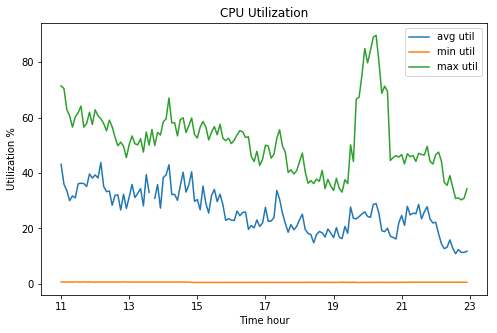

In [94]:
plt.figure(figsize=[8,5])

#plot CPU average utilization
lists = sorted(cpu_utilization_avg.items())
x, y = zip(*lists) # unpack a list of pairs into two tuples
cpu = [z for z in y]
hour = [(z- timestamps[0])/3600  for z in x]
plt.plot(hour, cpu, label="avg util")

#plot CPU minimum utilization
lists = sorted(cpu_utilization_min.items())
x, y = zip(*lists) # unpack a list of pairs into two tuples
cpu = [z for z in y]
hour = [(z- timestamps[0])/3600  for z in x]
plt.plot(hour, cpu, label="min util")

#plot CPU maximum utilization
lists = sorted(cpu_utilization_max.items())
x, y = zip(*lists) # unpack a list of pairs into two tuples
cpu = [z for z in y]
hour = [(z- timestamps[0])/3600  for z in x]
plt.plot(hour, cpu, label="max util")

#plot overall graph
plt.legend()
plt.title("CPU Utilization")
plt.ylabel("Utilization %")
plt.xlabel("Time hour")
hours = list(range(0,12))
labels = [11, 13, 15, 17, 19, 21, 23]
plt.xticks(range(0,14,2), labels) 
directory = "D:/Files/2019 Spring/High P Com/Project/HPC_project/figures/"
filename = os.path.join(directory, 'CPU_utilization.png')
plt.savefig(filename, dpi=300)
plt.show()

### Now we compute maxium, minium and average memory utilization

In [96]:
mem_utilization_avg = {}
for ts in timestamps:
    mem_utilization_avg[ts] = sum(su[su.timestamp == ts].util_memory) / 1313

In [58]:
mem_utilization_min = {}
for ts in timestamps:
    mem_utilization_min[ts] = min(su[su.timestamp == ts].util_memory)

In [59]:
mem_utilization_max = {}
for ts in timestamps:
    mem_utilization_max[ts] = max(su[su.timestamp == ts].util_memory)

In [ ]:
plt.figure(figsize=[8,5])

#plot memory average utilization
lists = sorted(mem_utilization_avg.items())
x, y = zip(*lists) # unpack a list of pairs into two tuples
cpu = [z for z in y]
hour = [(z- timestamps[0])/3600  for z in x]
plt.plot(hour, cpu, label="avg util")

#plot memory minimum utilization
lists = sorted(mem_utilization_min.items())
x, y = zip(*lists) # unpack a list of pairs into two tuples
cpu = [z for z in y]
hour = [(z- timestamps[0])/3600  for z in x]
plt.plot(hour, cpu, label="min util")

#plot memory maximum utilization
lists = sorted(mem_utilization_max.items())
x, y = zip(*lists) # unpack a list of pairs into two tuples
cpu = [z for z in y]
hour = [(z- timestamps[0])/3600  for z in x]
plt.plot(hour, cpu, label="max util")

#plot overall graph
plt.legend()
plt.title("Memory Utilization")
plt.ylabel("Utilization %")
plt.xlabel("Time hour")
hours = list(range(0,12))
labels = [11, 13, 15, 17, 19, 21, 23]
plt.xticks(range(0,14,2), labels) 
directory = "D:/Files/2019 Spring/High P Com/Project/HPC_project/figures/"
filename = os.path.join(directory, 'Memory_utilization.png')
plt.savefig(filename, dpi=300)
plt.show()

### Now we compute maxium, minium and average disk utilization

In [97]:
disk_utilization_avg = {}
for ts in timestamps:
    disk_utilization_avg[ts] = sum(su[su.timestamp == ts].util_disk) / 1313

In [68]:
disk_utilization_min = {}
for ts in timestamps:
    disk_utilization_min[ts] = min(su[su.timestamp == ts].util_disk)

In [70]:
disk_utilization_max = {}
for ts in timestamps:
    disk_utilization_max[ts] = max(su[su.timestamp == ts].util_disk)

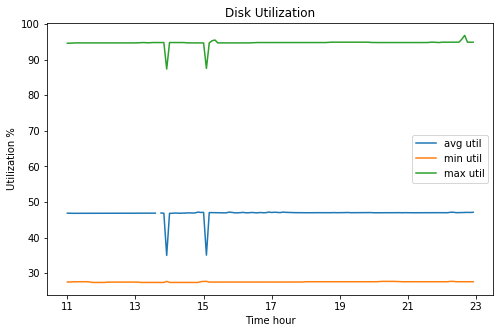

In [104]:
plt.figure(figsize=[8,5])

#plot disk average utilization
lists = sorted(disk_utilization_avg.items())
x, y = zip(*lists) # unpack a list of pairs into two tuples
cpu = [z for z in y]
hour = [(z- timestamps[0])/3600  for z in x]
plt.plot(hour, cpu, label="avg util")

#plot disk minimum utilization
lists = sorted(disk_utilization_min.items())
x, y = zip(*lists) # unpack a list of pairs into two tuples
cpu = [z for z in y]
hour = [(z- timestamps[0])/3600  for z in x]
plt.plot(hour, cpu, label="min util")

#plot disk maximum utilization
lists = sorted(disk_utilization_max.items())
x, y = zip(*lists) # unpack a list of pairs into two tuples
cpu = [z for z in y]
hour = [(z- timestamps[0])/3600  for z in x]
plt.plot(hour, cpu, label="max util")

#plot overall graph
plt.legend()
plt.title("Disk Utilization")
plt.ylabel("Utilization %")
plt.xlabel("Time hour")
hours = list(range(0,12))
labels = [11, 13, 15, 17, 19, 21, 23]
plt.xticks(range(0,14,2), labels) 
directory = "D:/Files/2019 Spring/High P Com/Project/HPC_project/figures/"
filename = os.path.join(directory, 'Disk_utilization.png')
plt.savefig(filename, dpi=300)
plt.show()

### Now we try to plot the CPU utilization heatmap with machineID 

In [101]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt

In [103]:
su.head()

,timestamp,machineID,util_CPU,util_memory,util_disk,load1,load5,load15
0,41700,237,23.38,30.080000,42.200001,15.82,13.860000,12.64
1,39600,265,26.36,29.540000,57.599998,17.46,18.900000,16.70
2,42600,770,49.14,60.099999,41.860001,33.20,31.220000,30.52
3,40800,776,33.24,47.520000,43.599998,21.84,22.100000,24.02
4,42900,393,45.72,58.720000,42.000000,34.10,36.239999,36.92
